<a href="https://colab.research.google.com/github/sakshisinghal936/DA-weekday-batch/blob/main/12March_Myntra_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### You are working as a data analyst in myntra company. You have to show stakeholders, performance of both brands and products listed on the platform.


In [1]:
!git clone "https://github.com/sakshisinghal936/myntra_analysis"

Cloning into 'myntra_analysis'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 22 (delta 6), reused 15 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 17.99 MiB | 22.33 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import pandas as pd
df = pd.read_csv("/content/myntra_analysis/myntra_data.csv")
df.head(10)

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0
5,Floral Cotton Maxi Dress,Vishudh,4.1,800,4349,1826,"S,M,L,XL,XXL",dresses/vishudh/vishudh-rust-brown-floral-prin...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",dresses,vishudh,2523,58
6,Fitted Crop Top,Tokyo Talkies,4.4,210,499,249,"S,M,L,XL",tops/tokyo-talkies/tokyo-talkies-pink-fitted-c...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tops,tokyo-talkies,250,50
7,Men Mesh Running Shoes,Woakers,3.4,591,3125,687,"UK6,UK7,UK8,UK9,UK10",sports-shoes/woakers/woakers-men-white--orange...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",sports-shoes,woakers,2438,78
8,Men Checked Pullover,Roadster,4.3,528,1999,999,"S,M,L,XL",sweaters/roadster/the-roadster-lifestyle-co-me...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",sweaters,roadster,1000,50
9,Girls Cotton Jersey Top,H&M,4.2,16,599,599,"8-10Y,10-12Y,12-14Y,14-15Y",tops/hm/hm-girls-pink-cotton-jersey-top/169299...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tops,hm,0,0


In [3]:
df["product_link"][2]

'kurtas/biba/biba-women-off-white--black-printed-pure-cotton-a-line-kurta/13446092/buy'

### Data Cleaning

1. Remove null values.
2. Remove duplicates.
3. Extract Product id from product link. On the basis we will decide distinct products.
4. Remove columns which are not required.
5. Rearrange columns.
6. Check discount amount and discount_percent calculation.
7. Check outliers (max and min values) for all numerical columns.

In [4]:
df.shape

(168029, 13)

In [5]:
df.isnull().sum()

,0
product_name,0
brand_name,0
rating,0
rating_count,0
marked_price,0
discounted_price,0
sizes,0
product_link,0
img_link,0
product_tag,0


In [6]:
df.duplicated().sum()

21418

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(146611, 13)

In [9]:
df["product_link"][0]

'wallets/lino-perros/lino-perros-women-peach-coloured-croc-textured-two-fold-wallet/18070682/buy'

In [10]:
df["product_id"] = df["product_link"].str.split("/").str[3]
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent,product_id
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36,18070682
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55,12548958
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20,13446092
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10,18017006
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0,18015232


In [11]:
df["product_link"].duplicated().sum()

173

In [12]:
df.drop(columns = ["sizes","product_link"	,"img_link","brand_tag"], inplace = True)

In [13]:
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,product_tag,discount_amount,discount_percent,product_id
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,wallets,467,36,18070682
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,flip-flops,715,55,12548958
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,kurtas,400,20,13446092
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,tshirts,60,10,18017006
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,kurta-sets,0,0,18015232


In [14]:
df = df[["product_id", "product_name", "product_tag", "brand_name", "rating", "rating_count", "marked_price",	"discounted_price","discount_amount"	,"discount_percent"  ]]
df.head()

,product_id,product_name,product_tag,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
0,18070682,Croc Textured Two Fold Wallet,wallets,Lino Perros,0.0,0,1295,828,467,36
1,12548958,Men Striped Sliders,flip-flops,Mast & Harbour,4.0,76,1299,584,715,55
2,13446092,Printed A-line Kurta,kurtas,Biba,4.3,66,1999,1599,400,20
3,18017006,Girls Floral Printed T-shirt,tshirts,Anthrilo,0.0,0,599,539,60,10
4,18015232,Women Printed Kurta with Skirt,kurta-sets,FASHION DWAR,0.0,0,2899,2899,0,0


In [15]:
df["discount_amount_nw"] = df["marked_price"]-	df["discounted_price"]
df[df["discount_amount_nw"] !=df["discount_amount"]]

<ipython-input-15-53d4e312f959>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["discount_amount_nw"] = df["marked_price"]-	df["discounted_price"]


,product_id,product_name,product_tag,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,discount_amount_nw


In [16]:
df.drop(["discount_amount_nw"], axis =1, inplace = True)

In [17]:
df.describe()

,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
count,146611.000000,146611.000000,146611.000000,146611.000000,146611.000000,146611.000000
mean,2.317154,123.589219,2525.860379,1532.622675,993.237704,37.147765
std,2.097438,817.995615,2437.720930,1842.427134,1235.525991,24.594289
min,0.000000,0.000000,50.000000,49.000000,0.000000,0.000000
25%,0.000000,0.000000,1299.000000,679.000000,210.000000,15.000000
50%,3.600000,6.000000,1999.000000,1012.000000,702.000000,40.000000
75%,4.300000,34.000000,2999.000000,1749.000000,1317.000000,59.000000
max,5.000000,55900.000000,113999.000000,45900.000000,68400.000000,91.000000


Analysis
Brand
1. Number of brands listed on the platform.
2. Average brand rating. (How many brands have average rating greater than 4 or 4.5?)
3. Number of products a particular brand is selling. Does it impact the rating_count? (Find the brand market size)
4. Relation between discount_percent and rating_count for a brand.
5. Which brand has maximum revenue and minimum revenue. (Top 5 brands and bottom 5 brands)
6. Histogram for discount_percent.(How does the average discount percent vary across different brands?
7. Are there any correlations between the rating, discount percent, and sales value of the products?



Product
1.



##### Which brand is giving max discount on a particular type of product.

In [21]:
df["brand_name"].nunique()

3194

In [22]:
df["brand_name"].unique()

array(['Lino Perros', 'Mast & Harbour', 'Biba', ..., 'Myra', 'StylPro',
       'LIL PITAARA'], dtype=object)

In [55]:
df["brand_name"].value_counts()

,count
brand_name,
Roadster,4557
Mast & Harbour,2398
DressBerry,2077
H&M,1998
Anouk,1785
...,...
deconstruct,1
FLUID,1
Plume,1


<Axes: xlabel='brand_name'>

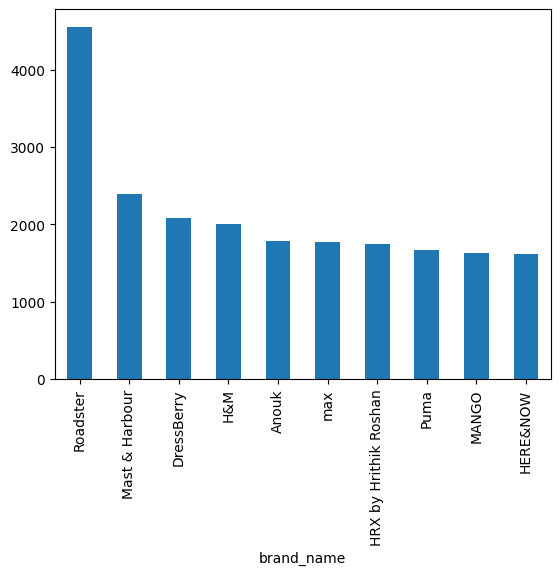

In [28]:
df["brand_name"].value_counts().head(10).plot(kind = "bar")

In [ ]:
# prompt: leave first 10 and take next 10 brands plot bar graph

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded as in the previous code

# Get the top 20 brands
top_20_brands = df['brand_name'].value_counts().head(20)

# Skip the first 10 brands
brands_to_plot = top_20_brands[10:20]

# Create the bar plot
plt.figure(figsize=(10, 6))
brands_to_plot.plot(kind='bar')
plt.title('Top 10 Brands (Excluding Top 10)')
plt.xlabel('Brand Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [18]:
df.head()

,product_id,product_name,product_tag,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
0,18070682,Croc Textured Two Fold Wallet,wallets,Lino Perros,0.0,0,1295,828,467,36
1,12548958,Men Striped Sliders,flip-flops,Mast & Harbour,4.0,76,1299,584,715,55
2,13446092,Printed A-line Kurta,kurtas,Biba,4.3,66,1999,1599,400,20
3,18017006,Girls Floral Printed T-shirt,tshirts,Anthrilo,0.0,0,599,539,60,10
4,18015232,Women Printed Kurta with Skirt,kurta-sets,FASHION DWAR,0.0,0,2899,2899,0,0


In [30]:
df["rating * rating _count"] = df["rating"] * df["rating_count"]
df.head()

,product_id,product_name,product_tag,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,rating * rating _count
0,18070682,Croc Textured Two Fold Wallet,wallets,Lino Perros,0.0,0,1295,828,467,36,0.0
1,12548958,Men Striped Sliders,flip-flops,Mast & Harbour,4.0,76,1299,584,715,55,304.0
2,13446092,Printed A-line Kurta,kurtas,Biba,4.3,66,1999,1599,400,20,283.8
3,18017006,Girls Floral Printed T-shirt,tshirts,Anthrilo,0.0,0,599,539,60,10,0.0
4,18015232,Women Printed Kurta with Skirt,kurta-sets,FASHION DWAR,0.0,0,2899,2899,0,0,0.0


In [47]:
brand_rating = df.groupby("brand_name")[["rating_count", "rating * rating _count"]].sum()
brand_rating["avg_rating_brand"] = brand_rating["rating * rating _count"]/brand_rating["rating_count"]
brand_rating

,rating_count,rating * rating _count,avg_rating_brand
brand_name,,,
1 Stop Fashion,2,10.0,5.000000
1st Step,0,0.0,NaN
20Dresses,14068,62316.2,4.429642
39 THREADS,7,27.3,3.900000
3PIN,6,25.2,4.200000
...,...,...,...
x2o,3879,15802.7,4.073911
yelloe,4098,17173.6,4.190727
yoho,0,0.0,NaN


In [49]:
brand_rating.sort_values("rating_count", ascending = False)

,rating_count,rating * rating _count,avg_rating_brand
brand_name,,,
Roadster,2016518,8297262.0,4.114648
Biotique,725218,3178631.7,4.383002
Maybelline,657744,2908354.0,4.421711
SASSAFRAS,590564,2530759.7,4.285327
HIGHLANDER,519361,2117918.3,4.077931
...,...,...,...
TRUEFITT & HILL,0,0.0,NaN
MARK HOME,0,0.0,NaN
TRUNEXT,0,0.0,NaN


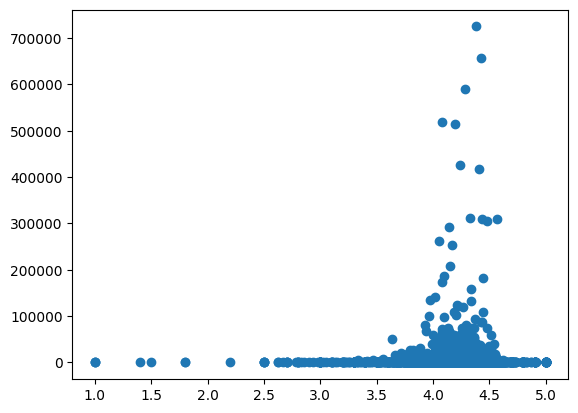

In [54]:
import matplotlib.pyplot as plt
plt.scatter(brand_rating["avg_rating_brand"].drop("Roadster"),brand_rating["rating_count"].drop("Roadster") )

In [56]:
df.head()

,product_id,product_name,product_tag,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,rating * rating _count
0,18070682,Croc Textured Two Fold Wallet,wallets,Lino Perros,0.0,0,1295,828,467,36,0.0
1,12548958,Men Striped Sliders,flip-flops,Mast & Harbour,4.0,76,1299,584,715,55,304.0
2,13446092,Printed A-line Kurta,kurtas,Biba,4.3,66,1999,1599,400,20,283.8
3,18017006,Girls Floral Printed T-shirt,tshirts,Anthrilo,0.0,0,599,539,60,10,0.0
4,18015232,Women Printed Kurta with Skirt,kurta-sets,FASHION DWAR,0.0,0,2899,2899,0,0,0.0


In [60]:
df.groupby("brand_name").agg(rating_count = ("rating_count","sum"), product_count= ("brand_name", "count")).sort_values("rating_count", ascending = False)

,rating_count,product_count
brand_name,,
Roadster,2016518,4557
Biotique,725218,99
Maybelline,657744,113
SASSAFRAS,590564,911
HIGHLANDER,519361,1472
...,...,...
TRUEFITT & HILL,0,1
MARK HOME,0,1
TRUNEXT,0,5


In [63]:
brand_discount_vs_ratingcount = df.groupby("brand_name").agg(avg_discount_percent = ("discount_percent","mean"), rating_count= ("rating_count", "sum"))

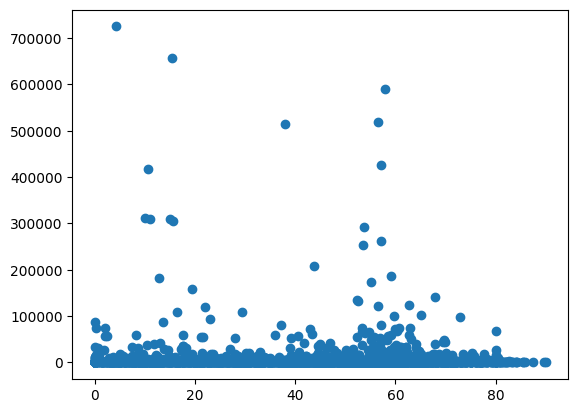

In [66]:
plt.scatter(brand_discount_vs_ratingcount["avg_discount_percent"].drop("Roadster"), brand_discount_vs_ratingcount["rating_count"].drop("Roadster"))

In [74]:
df["revenue"] = df["discounted_price"] *df["rating_count"]
brand_revenue = df.groupby("brand_name")["revenue"].sum().sort_values(ascending = False)

In [76]:
brand_revenue.head(10)

,revenue
brand_name,
Roadster,1352913126
HRX by Hrithik Roshan,474408600
SASSAFRAS,433004160
Philips,361430218
HIGHLANDER,332414780
Maybelline,325743841
Biotique,305998859
DressBerry,283192611
Plum,280634575


(array([594., 300., 307., 282., 306., 427., 458., 348., 149.,  23.]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <BarContainer object of 10 artists>)

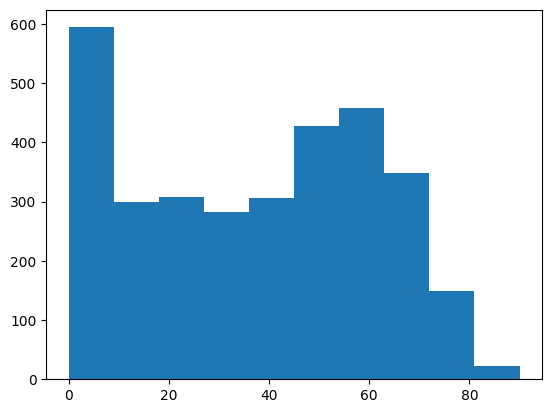

In [84]:
 plt.hist(brand_discount_vs_ratingcount["avg_discount_percent"])

{'whiskers': [<matplotlib.lines.Line2D at 0x78d2b8950ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x78d2b8b3f250>,
 'boxes': [<matplotlib.lines.Line2D at 0x78d2b8b46390>],
 'medians': [<matplotlib.lines.Line2D at 0x78d2b8b3d8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78d2b8b3d4d0>],
 'means': []}

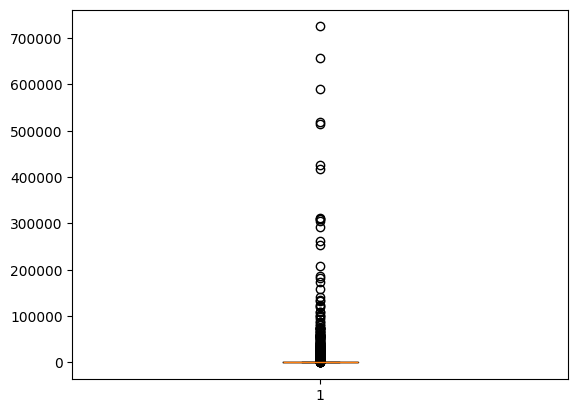

In [90]:
plt.boxplot(brand_discount_vs_ratingcount["rating_count"].drop("Roadster"))